In [127]:
import pandas as pd
df = pd.read_csv("C:/Users/ANJALI/Downloads/Walmart.csv")

In [128]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

This datset contains data of Walmart. There are  data available for 45 stores of Walmart.

Store - the store number

Date - the week of sales

Weekly_Sales - weekly sales for the given store

Holiday_Flag - whether the week is a special holiday (week 1 – Holiday week and 0 – Non-holiday week)

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

 Dependent variable or predicting variable is Weekly sales and rest are independent variables.

In [2]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [8]:
df.shape
## There are 6435 rows and 8 columns

(6435, 8)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


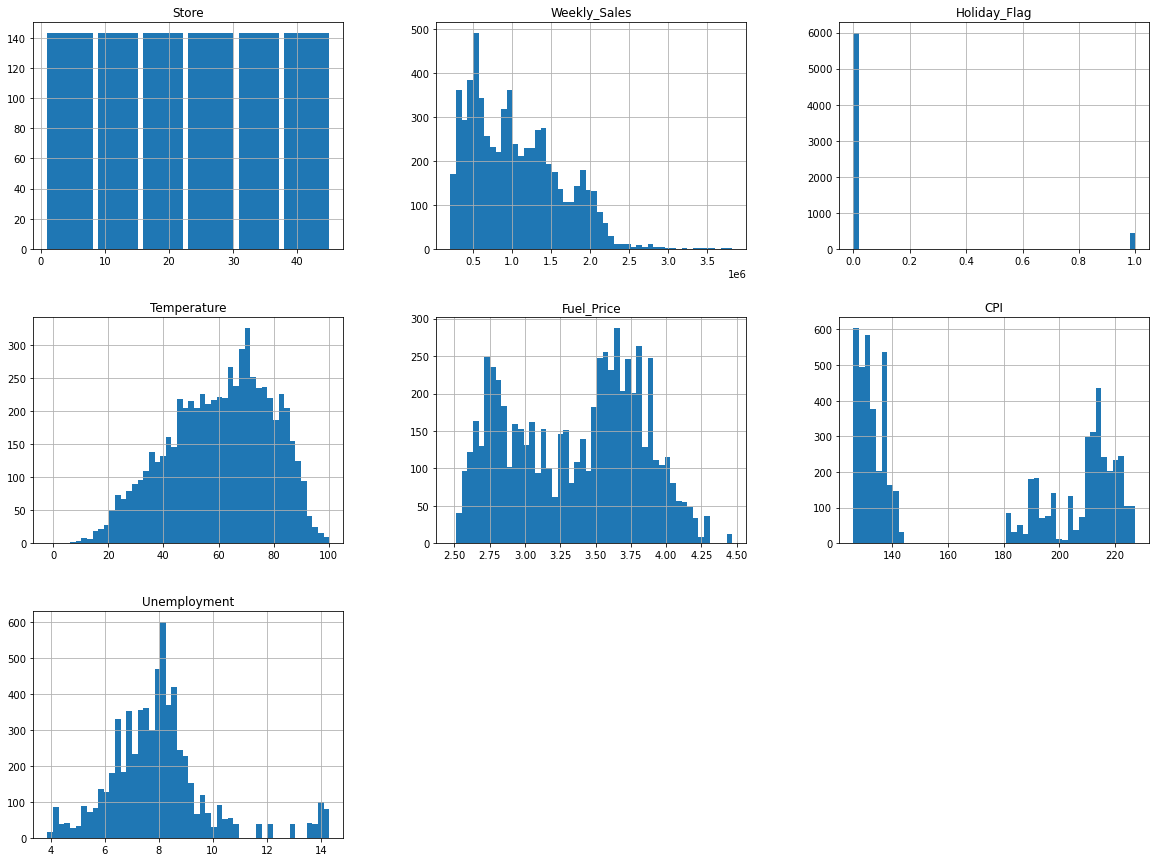

In [10]:
df.hist(bins=50, figsize=(20,15))
plt.show()

 Data cleaning 
1. checking null values
2. checking duplicates
3. descriptive statistics 
4. checking outliers
5. correlation


In [11]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


 There is no missing values

In [13]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
duplicates = df.duplicated()

duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)
## No duplicates 

Number of duplicates: 0


In [38]:
print(df.corr())


                         Store  Weekly_Sales  Holiday_Flag  Temperature  \
Store             1.000000e+00     -0.335332 -4.386841e-16    -0.022659   
Weekly_Sales     -3.353320e-01      1.000000  3.689097e-02    -0.063810   
Holiday_Flag     -4.386841e-16      0.036891  1.000000e+00    -0.155091   
Temperature      -2.265908e-02     -0.063810 -1.550913e-01     1.000000   
Fuel_Price        6.002295e-02      0.009464 -7.834652e-02     0.144982   
CPI              -2.094919e-01     -0.072634 -2.162091e-03     0.176888   
Unemployment      2.235313e-01     -0.106176  1.096028e-02     0.101158   
Weekly_Sales_log -2.947858e-01      0.956714  2.677021e-02    -0.092519   
Unemployment_log  2.226764e-01     -0.105479  1.223441e-02     0.093516   

                  Fuel_Price       CPI  Unemployment  Weekly_Sales_log  \
Store               0.060023 -0.209492      0.223531         -0.294786   
Weekly_Sales        0.009464 -0.072634     -0.106176          0.956714   
Holiday_Flag       -0.07834

<AxesSubplot:>

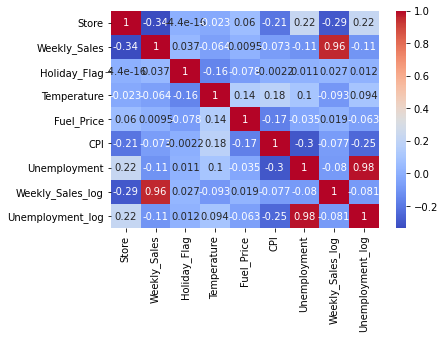

In [39]:
import seaborn as sns
# compute the correlation matrix
corr_matrix = df.corr()

# plot a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
##  no collinearity 

C:\Users\ANJALI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

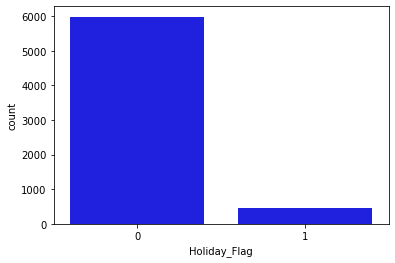

In [52]:
sns.countplot(df.Holiday_Flag,color='Blue')

In [129]:
from sklearn.model_selection import train_test_split

dff= df.drop(['Date'], axis=1)



Including the date or timestamp as a feature may introduce unwanted bias into the model. For example, if the data was collected during a specific time period or season, the model may be biased towards those specific conditions and may not generalize well to other time periods.

Outlier detection by boxplot and 

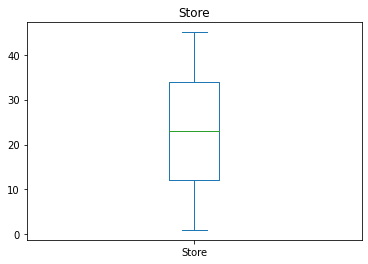

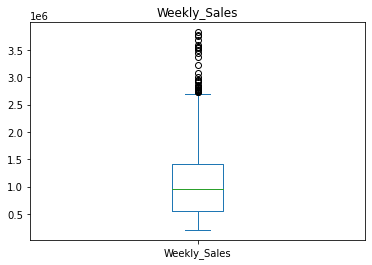

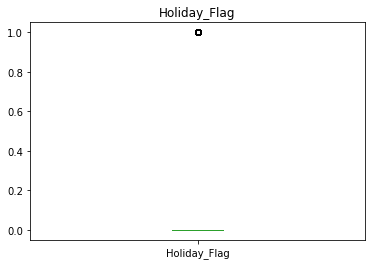

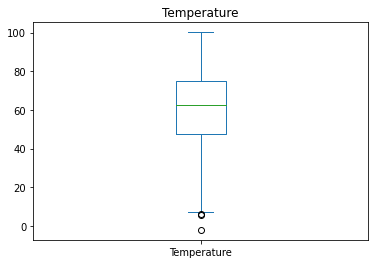

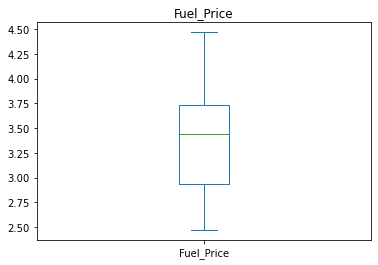

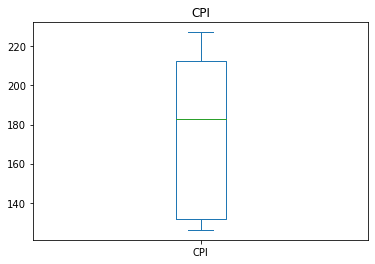

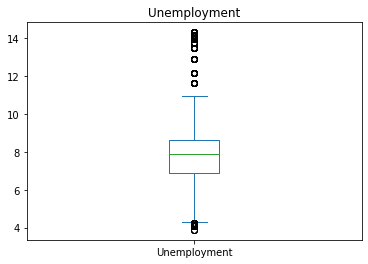

In [130]:
# create a list of column names
columns = list(dff.columns)

# loop over each column and create a box plot( to identify outliers)
for col in columns:
    plt.figure()
    df[col].plot(kind='box')
    plt.title(col)
    plt.show()

In [ ]:
outliers on weekly sale, holiday flag, temperature, unemployement

In [ ]:
# outlier by IQR method

In [131]:
def detect_outliers(column):
    # Plot a boxplot to visualize the distribution of the data
    fig, ax = plt.subplots(figsize=(2, 6))
    ax.boxplot(column, vert=False)
    ax.set_title('Boxplot of ' + column.name)
    plt.show()
    
    # Calculate the quartiles and IQR
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 3 * iqr
    upper_bound = q3 + 3* iqr
    
    # Find the outliers outside the bounds
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    
    # Print the results
    if len(outliers) > 0:
        print('Number of outliers:', len(outliers))
        print('Outlier values:', outliers)
    else:
        print('No outliers detected.')

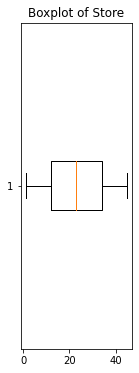

No outliers detected.


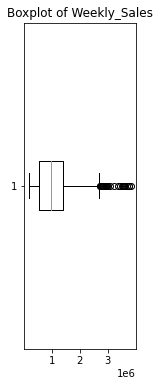

No outliers detected.


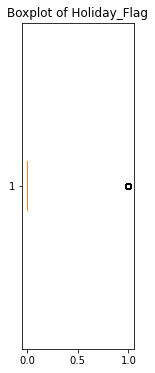

Number of outliers: 450
Outlier values: 1       1
31      1
42      1
47      1
53      1
       ..
6375    1
6386    1
6391    1
6397    1
6427    1
Name: Holiday_Flag, Length: 450, dtype: int64


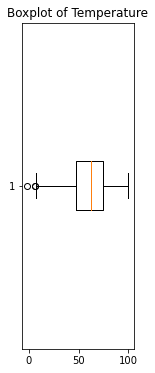

No outliers detected.


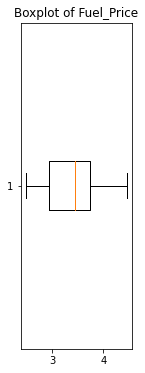

No outliers detected.


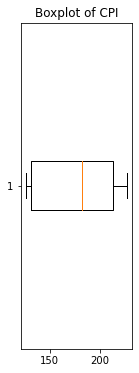

No outliers detected.


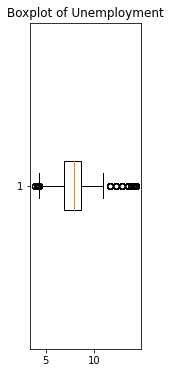

Number of outliers: 180
Outlier values: 1573    13.975
1574    13.975
1575    13.975
1576    13.975
1577    13.975
         ...  
5346    14.021
5347    14.021
5348    14.021
5349    14.021
5350    14.021
Name: Unemployment, Length: 180, dtype: float64


In [132]:
for col in dff.columns:
    detect_outliers(dff[col])
    ### 1 predictor variable has outliers 

In [ ]:
#Unemployement- Number of outliers: 180

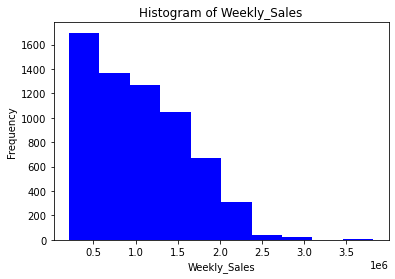

In [133]:
import matplotlib.pyplot as plt
import pandas as pd


# Select the column for the histogram
column_name = 'Weekly_Sales'
my_data = dff[column_name]

# Create a histogram
plt.hist(my_data, bins=10, color='blue')

# Add labels and title
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)

# Show the plot
plt.show()

Outliers in weekly sales, unemployement are log transformed

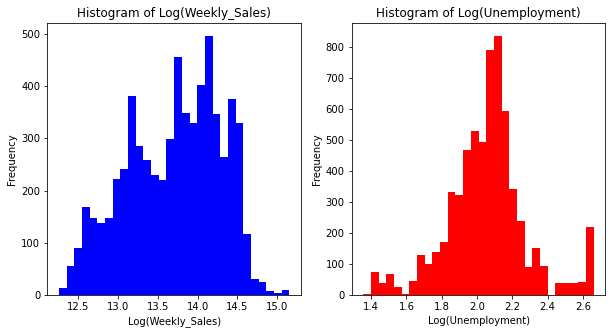

In [134]:
import matplotlib.pyplot as plt

# Log transform the Weekly_Sales and Temperature columns
dff['Weekly_Sales_log'] = np.log(dff['Weekly_Sales'])
dff['Unemployment_log'] = np.log(dff['Unemployment'])

# Plot the histograms of the log transformed variables
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].hist(dff['Weekly_Sales_log'], bins=30, color='blue')
ax[0].set_xlabel('Log(Weekly_Sales)')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Histogram of Log(Weekly_Sales)')

ax[1].hist(dff['Unemployment_log'], bins=30, color='red')
ax[1].set_xlabel('Log(Unemployment)')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Histogram of Log(Unemployment)')

plt.show()

This can help to reduce the impact of outliers, as extreme values are compressed towards the center of the distribution

In [135]:
dff_dummies = pd.get_dummies(dff,columns=['Holiday_Flag'])
print(dff_dummies.columns.to_list())

['Store', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales_log', 'Unemployment_log', 'Holiday_Flag_0', 'Holiday_Flag_1']


In [136]:
from sklearn.model_selection import train_test_split

# Define the features and target variable

x = dff_dummies.drop(['Weekly_Sales','Store'],axis=1)
y = dff_dummies.Weekly_Sales

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [137]:

# Standardize the data  to improve the performance of the algorithms and to ensures that the features are on the same scale.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Linear regression, Decision tree regression, Random forest regression, Support vector regression,Neural network regression can be performed


1.Linear regression

In [138]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [139]:
lr_score = lr.score(X_test, y_test)
lr_score
from sklearn.metrics import r2_score

accuracy = r2_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: 0.1472624106065723


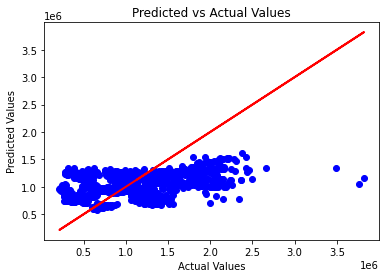

In [140]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, color='blue')
plt.plot(y_test, y_test, color='red', linewidth=2)
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

2. Decision Tree

In [141]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_pred = dtr.predict(X_test)

In [142]:
accuracy = r2_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: 0.8789534868836648


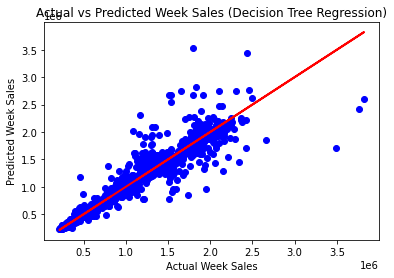

In [143]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Add a line of perfect predictions
plt.plot(y_test, y_test, color='red', linewidth=2)

# Set title, x-axis label, and y-axis label
plt.title('Actual vs Predicted Week Sales (Decision Tree Regression)')
plt.xlabel('Actual Week Sales')
plt.ylabel('Predicted Week Sales')

# Show the plot
plt.show()


3.Support vector regression

In [144]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)

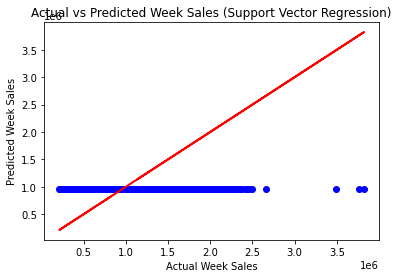

In [145]:

import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Add a line of perfect predictions
plt.plot(y_test, y_test, color='red', linewidth=2)

# Set title, x-axis label, and y-axis label
plt.title('Actual vs Predicted Week Sales (Support Vector Regression)')
plt.xlabel('Actual Week Sales')
plt.ylabel('Predicted Week Sales')

# Show the plot
plt.show()

In [146]:
accuracy = r2_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: -0.02838135299168676


In [ ]:
4.Neural Network

In [147]:
## neural network 
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000)
nn.fit(X_train, y_train)
y_pred = nn.predict(X_test)

C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


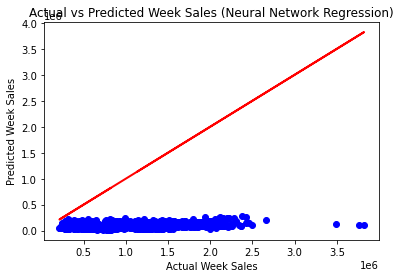

In [148]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Add a line of perfect predictions
plt.plot(y_test, y_test, color='red', linewidth=2)

# Set title, x-axis label, and y-axis label
plt.title('Actual vs Predicted Week Sales (Neural Network Regression)')
plt.xlabel('Actual Week Sales')
plt.ylabel('Predicted Week Sales')

# Show the plot
plt.show()

In [149]:
accuracy = r2_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: -2.7695017030293223


In [ ]:
The accuracy for neural network is less than 1%

5. Random forest

In [150]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42) # set the number of trees to 100
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

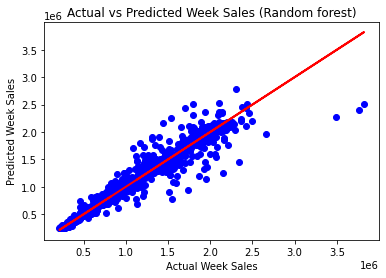

In [151]:
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Add a line of perfect predictions
plt.plot(y_test, y_test, color='red', linewidth=2)

# Set title, x-axis label, and y-axis label
plt.title('Actual vs Predicted Week Sales (Random forest)')
plt.xlabel('Actual Week Sales')
plt.ylabel('Predicted Week Sales')

# Show the plot
plt.show()

In [152]:
accuracy = r2_score(y_test, y_pred)
print(f"The accuracy of the model is: {accuracy}")

The accuracy of the model is: 0.9329646151946246


Hyper parameter tunning for decision tree

In [169]:
# Define hyperparameters and their possible values for tuning
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['mse', 'friedman_mse', 'mae']
}

# Create a GridSearchCV object with the defined hyperparameters and 5-fold cross-validation
grid_search = GridSearchCV(dtr, param_grid, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding mean squared error
print("Best Hyperparameters: ", grid_search.best_params_)
y_pred = grid_search.predict(X_test)


Best Hyperparameters:  {'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_split': 10}


C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
250 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "C:\Users\ANJALI\anaconda3\lib\site-packages\sklearn\base.py

In [174]:
# Create a decision tree regressor with the best hyperparameters
dtr = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_split=10)
# Compute the R-squared score of the model
accuracy = r2_score(y_test, y_pred)
print("R-squared Score: ", accuracy)


R-squared Score:  0.6634810262897268


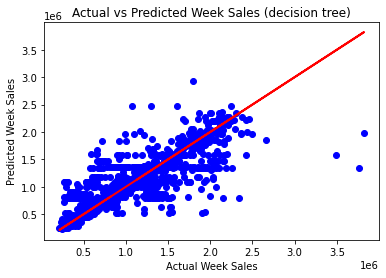

In [175]:

# Create a scatter plot of predicted versus actual values
import matplotlib.pyplot as plt

# Create a scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, color='blue')

# Add a line of perfect predictions
plt.plot(y_test, y_test, color='red', linewidth=2)

# Set title, x-axis label, and y-axis label
plt.title('Actual vs Predicted Week Sales (decision tree)')
plt.xlabel('Actual Week Sales')
plt.ylabel('Predicted Week Sales')

# Show the plot
plt.show()




